In [1]:
from peaceful_pie.unity_comms import UnityComms
import argparse
import gym
from gym import Env
from gym.spaces import Box, MultiBinary,Discrete
import numpy as np
import os
from torch.utils.tensorboard import SummaryWriter
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback
import gym
from gym import spaces
from gym.wrappers import FrameStack
from collections import deque
# Import UnityComms from peaceful_pie.unity_comms
from peaceful_pie.unity_comms import UnityComms
from peaceful_pie.unity_comms import UnityComms
from peaceful_pie import ray_results_helper

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def unity_comms(port: int):
    unity_comms = UnityComms(port)
    return unity_comms


In [3]:
port = 5000  # Replace with your desired port number
unity_comms_instance = unity_comms(port)

In [4]:
unity_comms_instance 
unity_comms = unity_comms_instance

In [ ]:
collision_count = 0

for i in range(2000):
    collision = unity_comms.GetRewardCollision_5000()
    if collision == True:
        collision_count += 1
        if collision_count > 5:
            print("collision detetcted five times")
            collision_count = 0
    else:
        print('0')

In [78]:
ray_reult=unity_comms.GetRayCastsResults_5000()

In [63]:
ray_reult

{'rayDistances': [[-1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   16.8165245,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0],
  [-1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   16.6079636,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0],
  [-1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   16.5398445,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0],
  [-1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   16.6093044,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0],
  [-1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   16.8192635,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0],
  [-1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -

In [79]:
distance = np.array(ray_reult['rayDistances'], dtype=np.float32)
types = np.array(ray_reult['rayHitObjectTypes'], dtype=np.int32)
num_types = ray_reult['NumObjectTypes']

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]], dtype=float32)

In [80]:
actual = ray_results_helper.ray_results_to_feature_np(
    ray_results_helper.RayResults(
        NumObjectTypes=num_types,
        rayDistances=distance,
        rayHitObjectTypes=types,
    )
)

In [67]:
actual

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [68]:
actual.shape

(2, 70, 20)

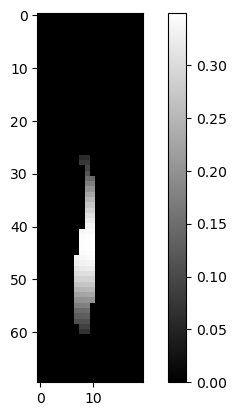

In [73]:

#just wll
observation = np.array([actual])  # Assuming the observation is represented as a 4D numpy array

observation_2d = observation[0, 0]  # Extract the 2D slice for visualization
plt.imshow(observation_2d, cmap='gray')  # Plot as grayscale image
plt.colorbar()
plt.show()


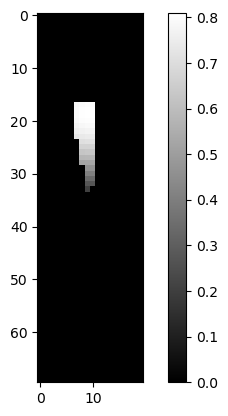

In [77]:
#wall and food
observation = np.array([actual])  # Assuming the observation is represented as a 4D numpy array

observation_2d = observation[0, 0]  # Extract the 2D slice for visualization
plt.imshow(observation_2d, cmap='gray')  # Plot as grayscale image
plt.colorbar()
plt.show()

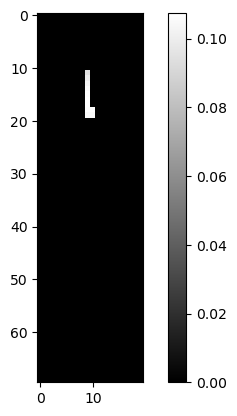

In [81]:
#food
observation = np.array([actual])  # Assuming the observation is represented as a 4D numpy array

observation_2d = observation[0, 0]  # Extract the 2D slice for visualization
plt.imshow(observation_2d, cmap='gray')  # Plot as grayscale image
plt.colorbar()
plt.show()

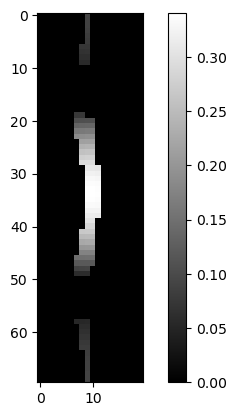

In [107]:
observation_2d = observation[0, 1]  # Extract the 2D slice for visualization
plt.imshow(observation_2d, cmap='gray')  # Plot as grayscale image
plt.colorbar()
plt.show()

In [108]:
observation_2d

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
#0 is wall, 1 is food

In [96]:
actual.shape

(2, 70, 20)

In [106]:
actual.argmax(axis=1)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0, 16, 18,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 23, 28, 34, 34, 34,  0,  0,  0,  0,
         0,  0,  0,  0]], dtype=int64)

In [113]:
import gym
from gym import spaces
import numpy as np

import gym
from gym import spaces
import numpy as np

class CustomObservationSpace(spaces.Box):
    def __init__(self, shape):
        super().__init__(low=0, high=1, shape=shape, dtype=np.float32)


In [114]:
obstacle_shape = (70, 20)  # Shape of the obstacle channel
reward_shape = (70, 20)  # Shape of the reward/follow channel

# Define the observation space with two channels
observation_space = spaces.Dict({
    'obstacle': CustomObservationSpace(obstacle_shape),
    'reward_follow': CustomObservationSpace(reward_shape)
})


In [117]:
observation_space

Dict(obstacle:Box([[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]], (70, 20), float32), reward_follow:Box([[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]], (70, 20), float32))

In [ ]:
ray_reult=unity_comms.GetRayCastsResults_5000()

In [118]:
class MyVector3:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

In [149]:
class UnityEnv(Env):
    def __init__(self, unity_comms, i):
        self.unity_comms = unity_comms
        self.action_space = Discrete(15)  # Scale the action range to -1.0 to 1.0
        #becauuse i a usng raycast both shape are same
        shape = (70, 20)  # Shape of the observation
        observation_space = spaces.Dict({
            'obstacle': CustomObservationSpace(shape),
            'reward_follow': CustomObservationSpace(shape)
        })
        self.observation_space = observation_space
        self.initial_position = None
        self.prev_position = None
        self.prev_velocity = 0
        self.initial_get_CarCollisionDetected =0
        self.i = i

    def RayCast(self):
        ray_results = getattr(self.unity_comms, f"GetRayCastsResults_{self.i}")()
        distance = np.array(ray_results['rayDistances'], dtype=np.float32)
        types = np.array(ray_results['rayHitObjectTypes'], dtype=np.int32)
        num_types = ray_results['NumObjectTypes']
        self.actual_result = ray_results_helper.ray_results_to_feature_np(
            ray_results_helper.RayResults(
                NumObjectTypes=num_types,
                rayDistances=distance,
                rayHitObjectTypes=types,
            )
        )  

        return self.actual_result
    

    def Is_obstacle_visible(self):
        obstacle_channel = self.actual_result[0]  # Extract the obstacle channel from the actual result
        if np.max(obstacle_channel) > 0:
            return True
        return False

    def Is_reward_visible(self):
        reward_channel = self.actual_result[1]  # Extract the reward channel from the actual result
        if np.max(reward_channel) > 0:
            return True
        return False

    def Goal(self):
        if self.Is_reward_visible() == True:
            goal_channel = self.actual_result[1]
            if np.max(goal_channel) > 1:
                return True
        return False


    def get_reward(self):
        obstacle_penalty = -1.0  # Penalty for encountering an obstacle
        reward_bonus = .25 # Reward for finding a reward object
        step_penalty = -0.01  # Penalty for each step taken
        goal_reward = 1  # Reward for reaching the goal
        car_collision_penalty = -1.0  # Penalty for colliding with the car
        valocity_reward = 0.1 #reward for moving forward

        reward = 0.0

        if self.Is_obstacle_visible()== True:
            reward += obstacle_penalty

        if self.Is_reward_visible()== True:
            reward += reward_bonus

        reward += step_penalty

        if self.Goal() == True:
            reward += goal_reward

        if self.Get_carCollisionDetected() == True:
            reward += car_collision_penalty

        if self.Check_valocity_increment()== True:
            reward += valocity_reward

        return reward

    def reset(self):
        if self.done() == True:
            Reset_Car = getattr(self.unity_comms, f"ResetPosition_{self.i}")()  
            Reset_Agent = getattr(self.unity_comms, f"ResetPosition_Plane_{self.i}")()


    def done(self):
        if self.Get_carCollisionDetected() == True:
            return True
        elif self.Get_movingPlaneCollision() == True:
            return True
        elif self.Get_planeCollision() == True:
            return True
        elif self.Check_stuck() == True:
            return True
        else:
            return False

    def Get_carCollisionDetected(self):
        collision_count = 0
        collision = collision = getattr(self.unity_comms, f"CarCollisionDetected_{self.i}")()
        if collision == 1:
            collision_count += 1
            if collision_count >=2:
                collision_count = 0
                return True

        return False
    
    def Get_movingPlaneCollision(self):
        collision_count = 0
        collision = getattr(self.unity_comms, f"GetMovingPlaneCollision_{self.i}")()
        if collision == 1:
            collision_count += 1
            if collision_count >= 3:
                collision_count = 0
                return True

        return False
    
    def Get_planeCollision(self):
        collision_count = 0
        collision = getattr(self.unity_comms, f"GetPlaneCollision_{self.i}")()
        if collision == 1:
            collision_count += 1
            if collision_count > 0:
                collision_count = 0
                return True

        return False
    
    
    def Get_rewardCollision(self):
        collision = getattr(self.unity_comms, f"GetRewardCollision_{self.i}")()
        self.rewardcollision = collision

    def step(self, action):
        # Perform the action based on the provided action index
        if action == 0:
            getattr(self.unity_comms, f"GoForward_{self.i}")()
        elif action == 1:
            getattr(self.unity_comms, f"GoReverse_{self.i}")()
        elif action == 2:
            getattr(self.unity_comms, f"TurnLeft_{self.i}")()
        elif action == 3:
            getattr(self.unity_comms, f"TurnRight_{self.i}")()
        elif action == 4:
            getattr(self.unity_comms, f"Handbrake_{self.i}")()
        elif action == 5:
            getattr(self.unity_comms, f"GoForward_{self.i}")()
            getattr(self.unity_comms, f"TurnLeft_{self.i}")()
        elif action == 6:
            getattr(self.unity_comms, f"GoForward_{self.i}")()
            getattr(self.unity_comms, f"TurnRight_{self.i}")()
        elif action == 7:
            getattr(self.unity_comms, f"GoForward_{self.i}")()
            getattr(self.unity_comms, f"Handbrake_{self.i}")()
        elif action == 8:
            getattr(self.unity_comms, f"GoReverse_{self.i}")()
            getattr(self.unity_comms, f"TurnLeft_{self.i}")()
        elif action == 9:
            getattr(self.unity_comms, f"GoReverse_{self.i}")()
            getattr(self.unity_comms, f"TurnRight_{self.i}")()
        elif action == 10:
            getattr(self.unity_comms, f"GoReverse_{self.i}")()
            getattr(self.unity_comms, f"Handbrake_{self.i}")()
        elif action == 11:
            getattr(self.unity_comms, f"GoForward_{self.i}")()
            getattr(self.unity_comms, f"TurnLeft_{self.i}")()
            getattr(self.unity_comms, f"Handbrake_{self.i}")()
        elif action == 12:
            getattr(self.unity_comms, f"GoForward_{self.i}")()
            getattr(self.unity_comms, f"TurnRight_{self.i}")()
            getattr(self.unity_comms, f"Handbrake_{self.i}")()
        elif action == 13:
            getattr(self.unity_comms, f"GoReverse_{self.i}")()
            getattr(self.unity_comms, f"TurnLeft_{self.i}")()
            getattr(self.unity_comms, f"Handbrake_{self.i}")()
        elif action == 14:
            getattr(self.unity_comms, f"GoReverse_{self.i}")()
            getattr(self.unity_comms, f"TurnRight_{self.i}")()
            getattr(self.unity_comms, f"Handbrake_{self.i}")()
        else:
            raise ValueError("Invalid action index")


        # Get the raycasting results
        self.RayCast()

        # Create the observation dictionary
        observation = {
            'obstacle': self.actual_result[0],  # Assign the actual result to the 'obstacle' channel
            'reward_follow': self.actual_result[1]  # Assign the actual result to the 'reward_follow' channel
        }


        reward = self.get_reward()
        done = self.done()
    # Update the info dictionary with relevant information
        info = {
            'episode_reward': 0.0,  # Replace with the actual episode reward
            'episode_length': 0,  # Replace with the actual episode length
            'current_observation': observation,
            'action_taken': action,
            'obstacle_visible': self.Is_obstacle_visible(),
            'reward_visible': self.Is_reward_visible(),
            'goal_reached': self.Goal(),
            'car_collision_detected': self.Get_carCollisionDetected(),
            'velocity_incremented': self.Check_valocity_increment(),
        }
        return observation, reward, done, info


    def Get_velocity(self):
        valocity =  getattr(self.unity_comms, f"CarSpeedUI_{self.i}")()
        return valocity

    def Check_valocity_increment(self):
        valocity = self.Get_velocity()
        if valocity > self.prev_velocity:
            self.prev_velocity = valocity
            return True
        else:
            return False



    def Check_stuck(self):
        position_threshold = 0.01
        consecutive_steps = 20
        position_counter = 0
        
        if self.prev_position is None:
            self.prev_position = self.get_position()

        for _ in range(consecutive_steps):
            x, y, z = self.get_position()

            position_diff = np.linalg.norm(np.array([x, y, z]) - np.array(self.prev_position))
            if position_diff < position_threshold:
                position_counter += 1
            else:
                position_counter = 0

            self.prev_position = [x, y, z]

        if position_counter >= consecutive_steps:
            return True
        else:
            return False


    def get_position(self):
        position = getattr(self.unity_comms, f"GetPosition_{self.i}")()
        # Extract x, y, and z components from position
        x = position['x']
        y = position['y']
        z = position['z']
        return x, y, z




In [150]:
env = UnityEnv(unity_comms,5000)

In [151]:
done = False
while not done:
    action = np.random.randint(0, 15)
    observation, reward, done, info = env.step(action)

In [152]:
reward

-0.91

In [153]:
info

{'episode_reward': 0.0,
 'episode_length': 0,
 'current_observation': {'obstacle': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  'reward_follow': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)},
 'action_taken': 12,
 'obstacle_visible': True,
 'reward_visible': False,
 'goal_reached': False,
 'car_collision_detected': False,
 'velocity_incremented': False}

In [142]:
observation

{'obstacle': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'reward_follow': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)}

In [136]:
for i in range(2000):
    step = np.random.randint(0, 15)
    env.step(step)

KeyboardInterrupt: 